In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota=pd.read_csv(r"C:\Users\bivin\OneDrive\Desktop\ToyotaCorolla.csv",encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:9],toyota.iloc[:,12:18]],axis=1)
toyota1

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,2000,3,4,5,210,1165
1,13750,23,72937,Diesel,90,2000,3,4,5,210,1165
2,13950,24,41711,Diesel,90,2000,3,4,5,210,1165
3,14950,26,48000,Diesel,90,2000,3,4,5,210,1165
4,13750,30,38500,Diesel,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3,4,5,69,1025
1432,10845,72,19000,Petrol,86,1300,3,4,5,69,1015
1433,8500,71,17016,Petrol,86,1300,3,4,5,69,1015
1434,7250,70,16916,Petrol,86,1300,3,4,5,69,1015


In [5]:
toyota1=toyota1.drop(toyota1.columns[[3,7]],axis=1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
toyota1=toyota1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'Tax'},axis=1)
toyota1

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
toyota1.describe(include='all')

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [9]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
toyota1=toyota1.drop_duplicates().reset_index(drop=True)
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight


In [11]:
toyota1.duplicated().any()

False

# Correlation analysis

In [12]:
toyota1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


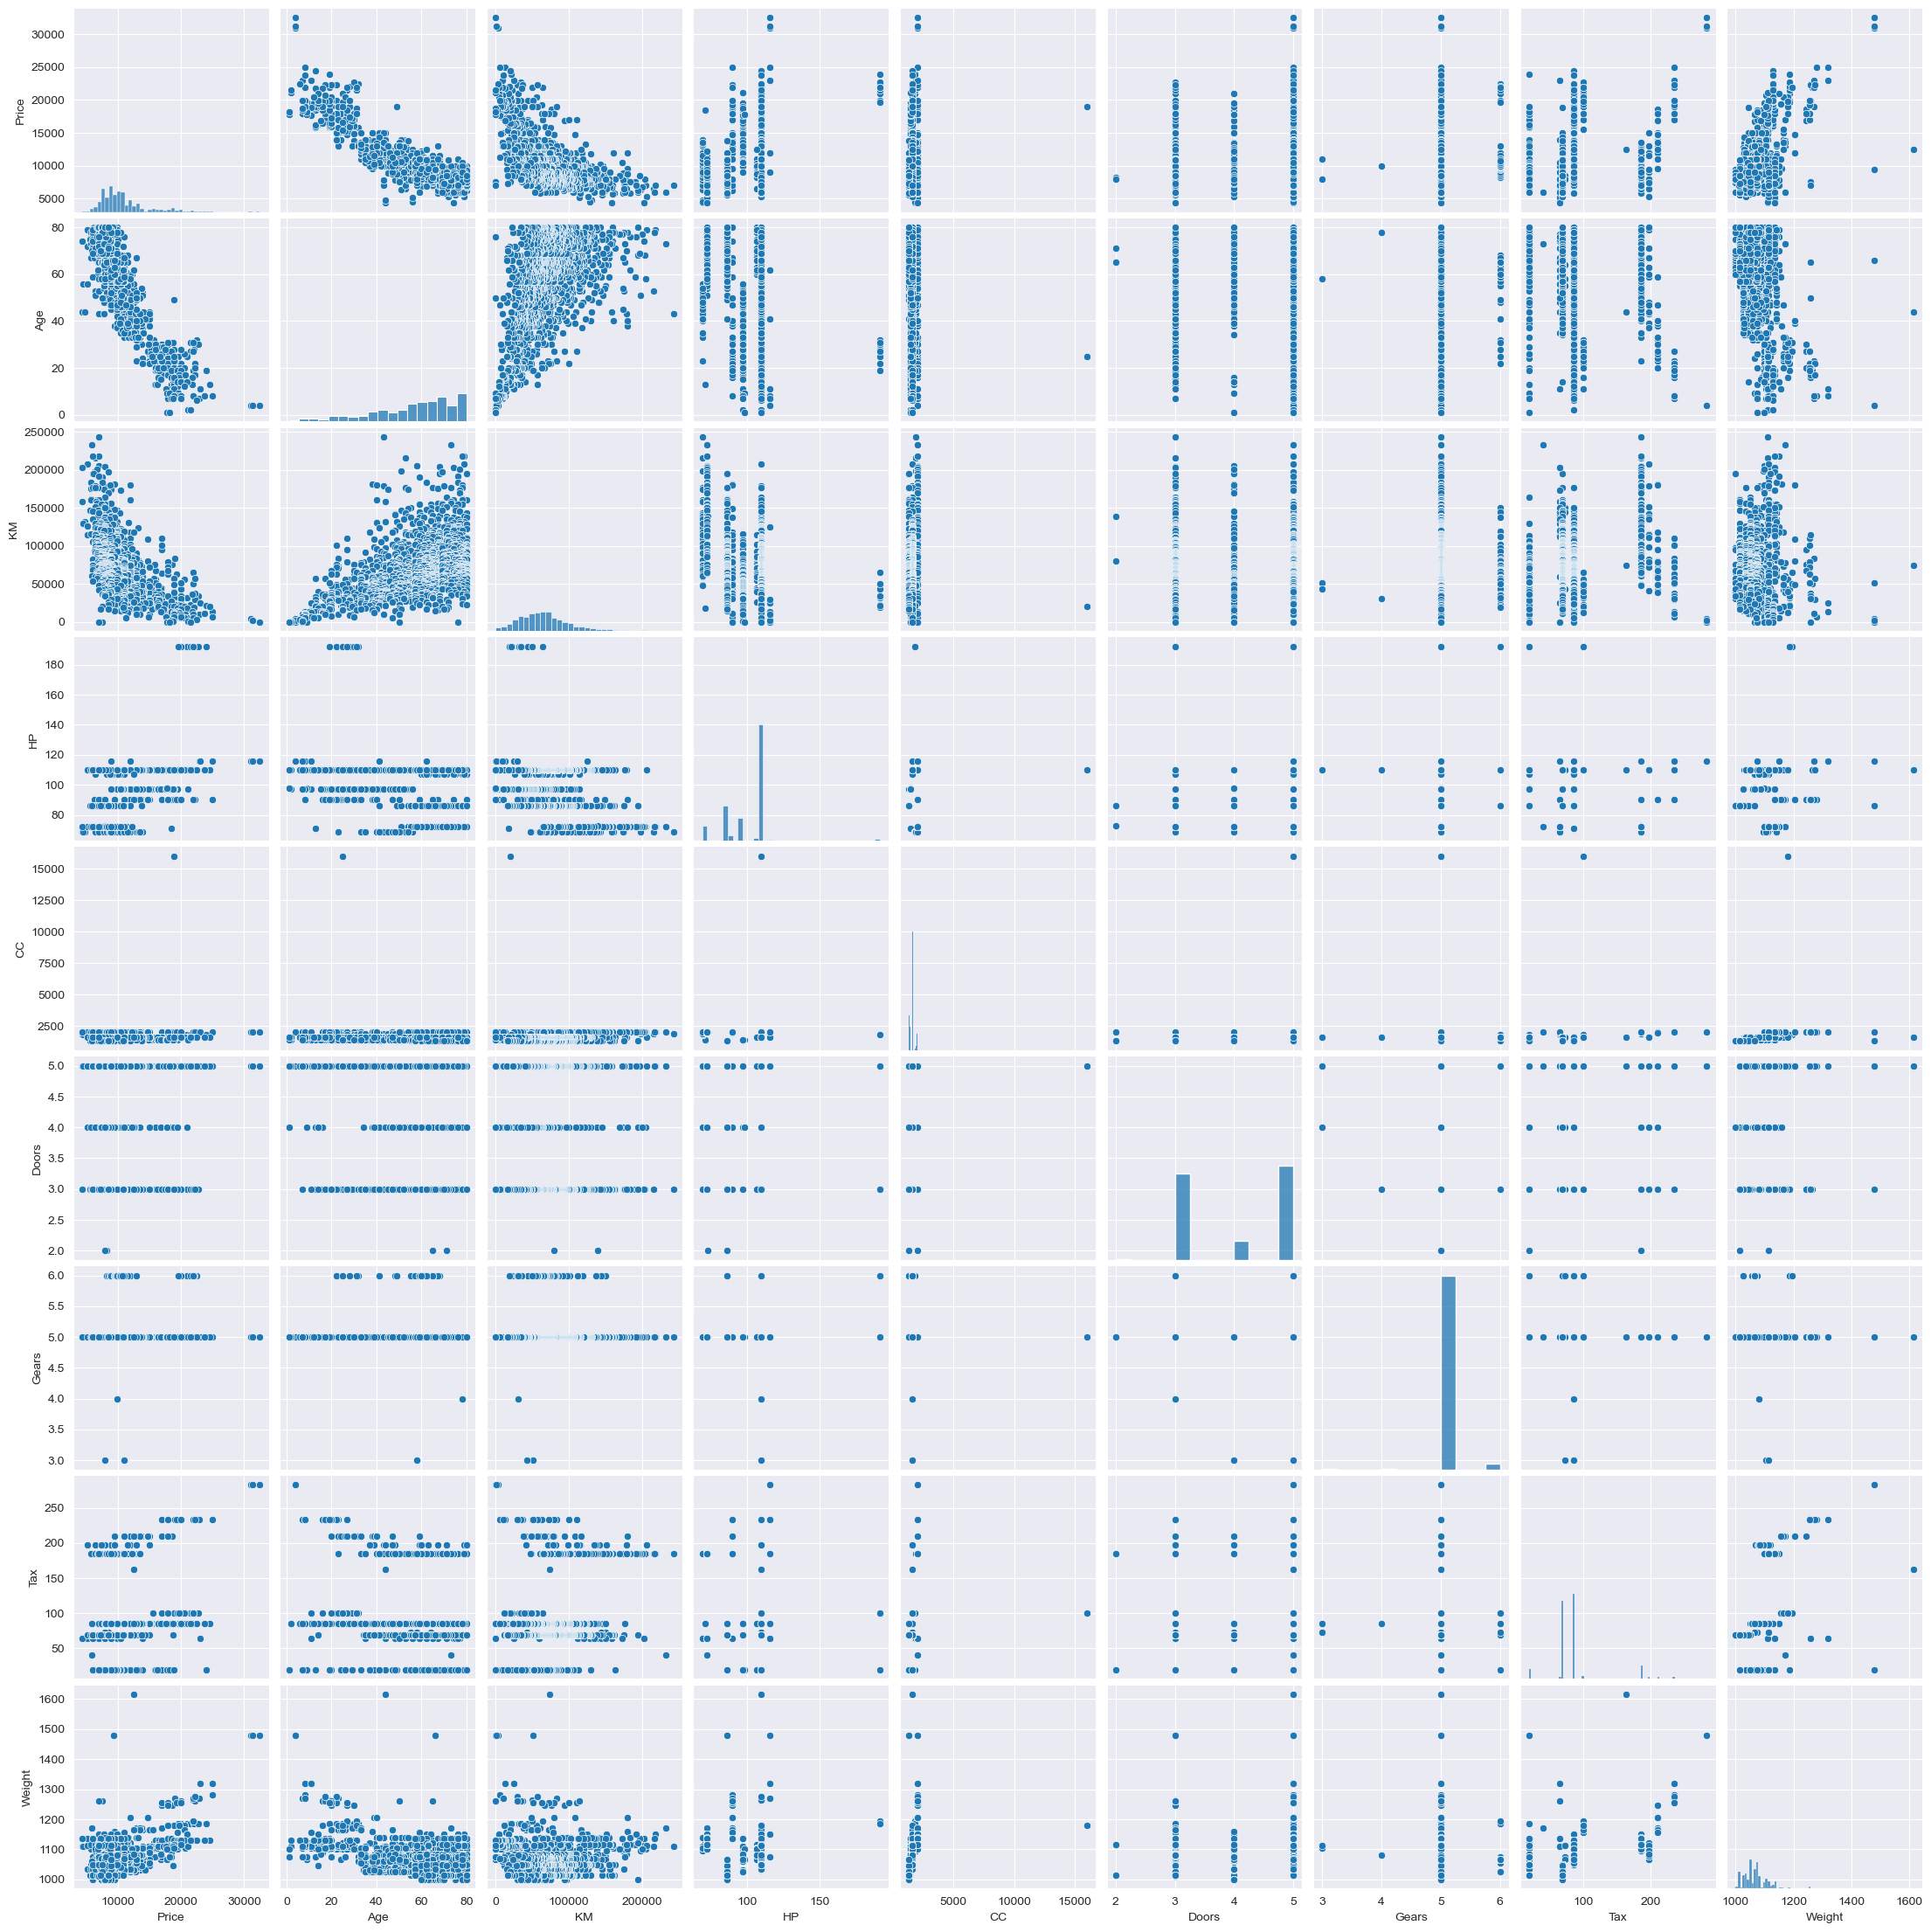

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

# Model Building

In [14]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=toyota1).fit()

In [15]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [16]:
model.tvalues

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
Tax           2.944198
Weight       15.760663
dtype: float64

In [17]:
np.round(model.pvalues,5)

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
Tax          0.00329
Weight       0.00000
dtype: float64

In [18]:
model.rsquared,model.rsquared_adj # model has 86.25% accuracy

(0.8625200256947, 0.8617487495415146)

In [19]:
# here CC & Doors has higher pvalues
# so lets build simple&multi linear regresson model accoring to this columns

In [20]:
slr1=smf.ols('Price~CC',data=toyota1).fit()

In [21]:
slr1.tvalues,slr1.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [22]:
slr2=smf.ols('Price~Doors',data=toyota1).fit()


In [23]:
slr2.tvalues,slr2.pvalues # Doors also  has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [24]:
mlr=smf.ols('Price~CC+Doors',data=toyota1).fit()

In [25]:
# finding tvalues and pvalues
mlr.tvalues,mlr.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [26]:
# here CC & Doors has  significant pvalues 

# model validation technique
## collinerity check

In [27]:
## vif=1/(1-rsquare)
r1=smf.ols('Age~KM+HP+CC+Doors+Gears+Tax+Weight',data=toyota1).fit().rsquared
v1=1/(1-r1)
r2=smf.ols('KM~Age+HP+CC+Doors+Gears+Tax+Weight',data=toyota1).fit().rsquared
v2=1/(1-r2)
r3=smf.ols('HP~Age+KM+CC+Doors+Gears+Tax+Weight',data=toyota1).fit().rsquared
v3=1/(1-r3)

r4=smf.ols('CC~KM+HP+Age+Doors+Gears+Tax+Weight',data=toyota1).fit().rsquared
v4=1/(1-r4)
r5=smf.ols('Doors~Age+KM+HP+CC+Gears+Tax+Weight',data=toyota1).fit().rsquared
v5=1/(1-r5)
r6=smf.ols('Gears~Age+KM+HP+CC+Doors+Tax+Weight',data=toyota1).fit().rsquared
v6=1/(1-r6)
r7=smf.ols('Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota1).fit().rsquared
v7=1/(1-r7)
r8=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Tax',data=toyota1).fit().rsquared
v8=1/(1-r8)

d1={'features':['Age','KM','HP','CC','Doors','Gears','Tax','Weight'],
   'vif':[v1,v2,v3,v4,v5,v6,v7,v8]}

vif=pd.DataFrame(d1)
vif

,features,vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Tax,2.295375
7,Weight,2.487180


# residual analysis

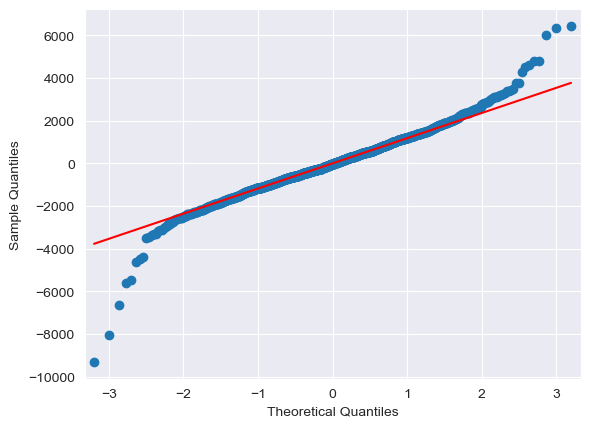

In [28]:
sm.qqplot(model.resid,line='q');

In [29]:
np.where(model.resid>6000)

(array([109, 146, 522], dtype=int64),)

In [30]:
np.where(model.resid<-6000)

(array([220, 600, 959], dtype=int64),)

Text(0.5, 1.0, 'Residual plot')

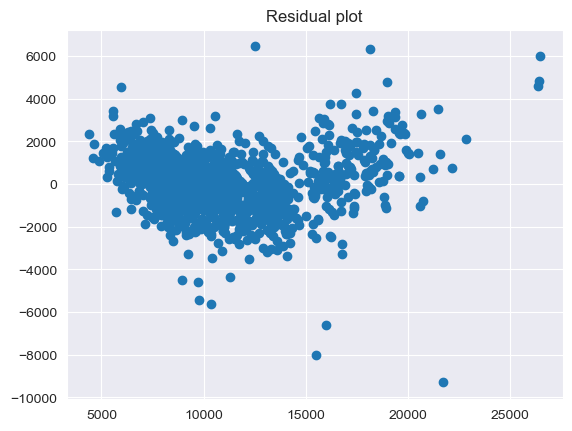

In [31]:
## test for homoscedacity

plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual plot')

In [32]:
## Residual vs regressors

eval_env: 1


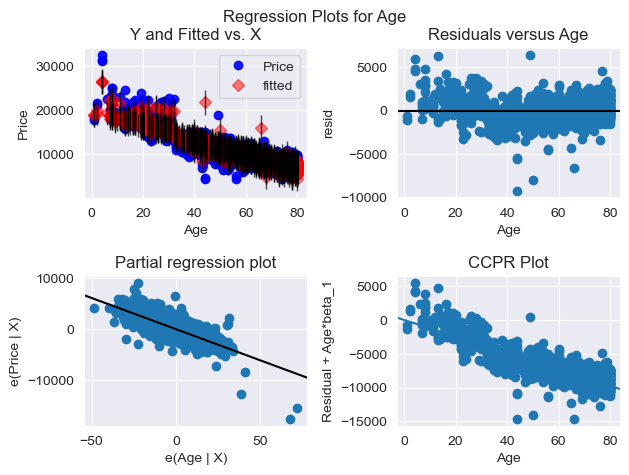

In [33]:
sm.graphics.plot_regress_exog(model,'Age');

eval_env: 1


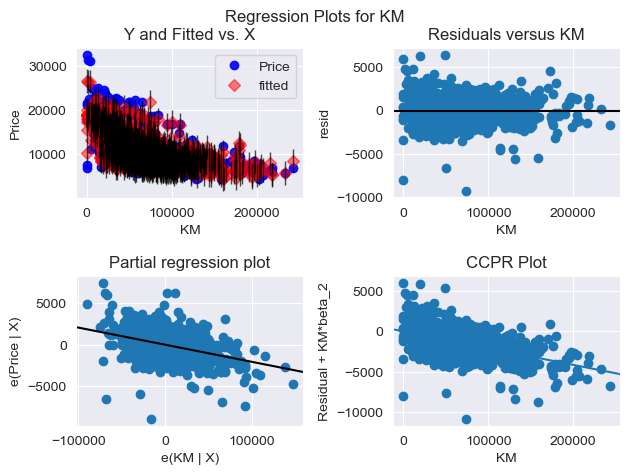

In [34]:
sm.graphics.plot_regress_exog(model,'KM');

eval_env: 1


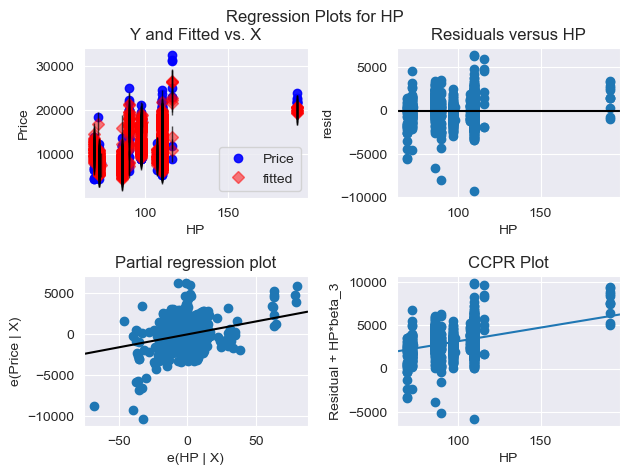

In [35]:
sm.graphics.plot_regress_exog(model,'HP');

eval_env: 1


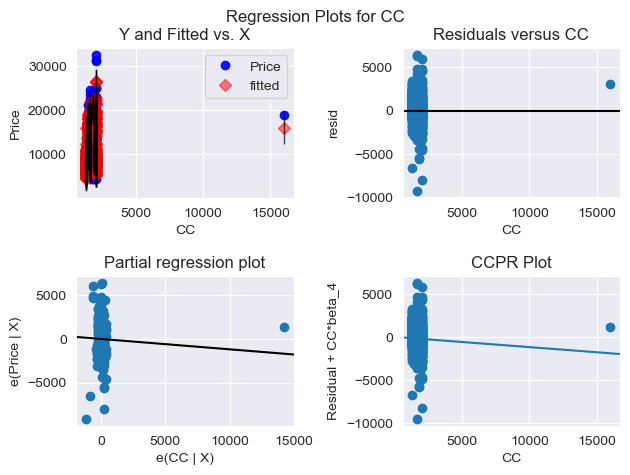

In [36]:
sm.graphics.plot_regress_exog(model,'CC');

eval_env: 1


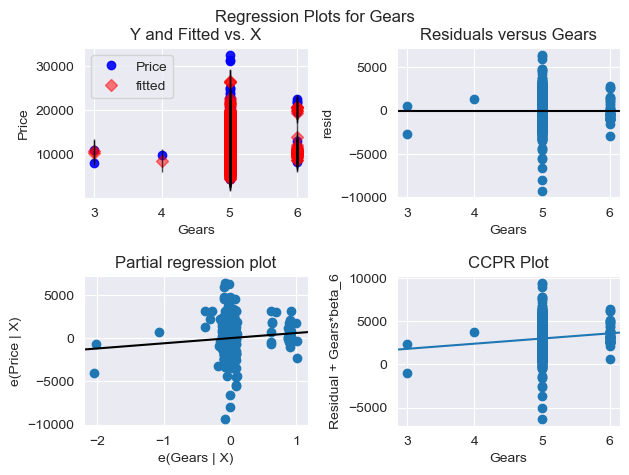

In [37]:
sm.graphics.plot_regress_exog(model,'Gears');

eval_env: 1


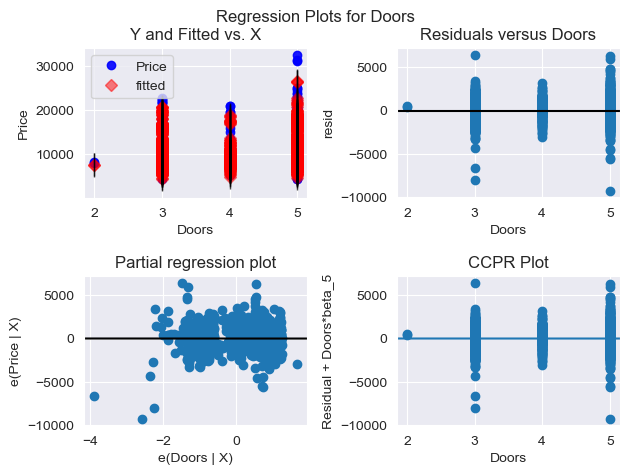

In [38]:
sm.graphics.plot_regress_exog(model,'Doors');

eval_env: 1


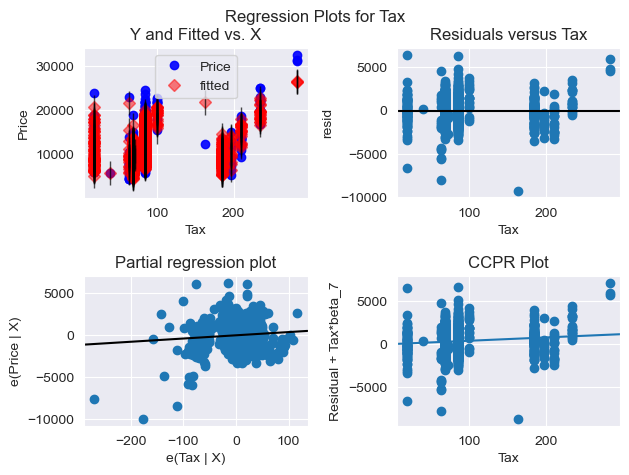

In [39]:
sm.graphics.plot_regress_exog(model,'Tax');

eval_env: 1


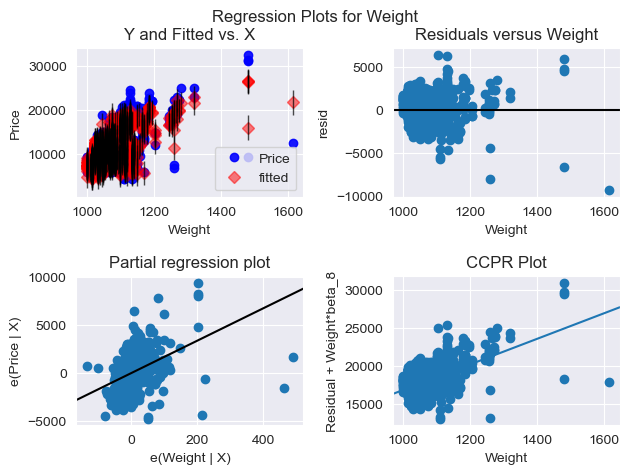

In [40]:
sm.graphics.plot_regress_exog(model,'Weight');

# Model deletion diagnostic

In [41]:
## cooks deistance

In [42]:
c,p=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

<StemContainer object of 3 artists>

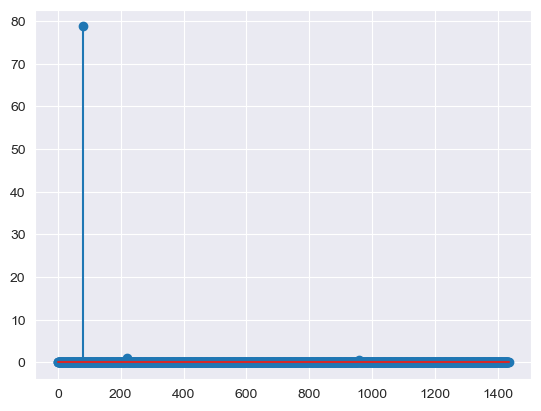

In [43]:
plt.stem(c)

In [44]:
np.argmax(c),np.max(c)

(80, 78.7295058224851)

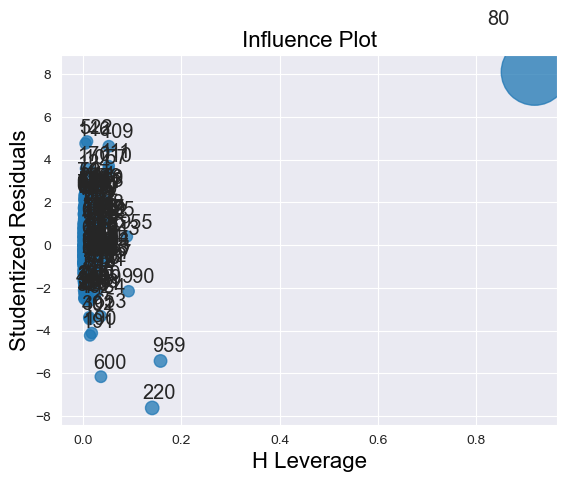

In [45]:
influence_plot(model);

In [46]:
## leverage cutoff
k=len(toyota1.columns)
n=len(toyota1)

lv=(3*(k+1))/n
lv

0.020905923344947737

# improving  the model

In [47]:
## improving the model by deleting 80th column
toyota2=toyota1.drop(index=80)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [54]:
finalmodel=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=toyota2).fit()

In [55]:
finalmodel.rsquared,model1.rsquared_adj # model accuracy improved to 86.81%

(0.8681163912634053, 0.867375992056463)

# Model predictions

In [53]:
test=pd.DataFrame({'Age':18,'KM':28000,'HP':80,'CC':1300,'Doors':4,'Gears':5,'Tax':76,'Weight':1200},index=[0])
test

,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,18,28000,80,1300,4,5,76,1200


In [57]:
# manual prediction
finalmodel.predict(test)

0    18295.483557
dtype: float64

In [58]:
# automatic predictions
ypred=finalmodel.predict(toyota2)
ypred

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1430     8970.611964
1431     8435.944671
1432     8591.765915
1433     8714.053275
1434     9966.948423
Length: 1434, dtype: float64